#Práctica 2 SOC
####Ela Katherine Shepherd Arévalo
####Belén García Puente
####Víctor Santamaría Gredilla

In [1]:
#importing the networkx library
import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')


SyntaxError: ignored

-------------------------------------------------------------------
#Estudio Barabasi-Albert Extendido

In [3]:
def estudio_red_BA_EX(numnodos_list, m_list, params, num_iteraciones):
  for N in numnodos_list:
    for M in m_list:
      for P in params:
        is_connected = True
        Grado_Medio = []
        Aristas_Media = []
        Camino_Corto = []
        Comp_conexa = []
        Grado_Cluster = []
        for x in range(num_iteraciones):
          grafo_barabasi =  nx.extended_barabasi_albert_graph(N,M, P[0], P[1])
          #grado medio
          dgDict = dict(grafo_barabasi.degree())
          average_degree = sum(dgDict.values()) / len(dgDict)
          Grado_Medio.append(average_degree)
          #numero de enlaces/numero de aristas
          aristas = len(grafo_barabasi.edges)
          Aristas_Media.append(aristas)
          #numero de componentes conexas
          cc = nx.number_connected_components(grafo_barabasi)
          if (cc > 1):
            is_connected = False
          Comp_conexa.append(cc)
          #media del camino mas corto
          if (is_connected): 
            camino = nx.average_shortest_path_length(grafo_barabasi)
            Camino_Corto.append(camino)          
          #grado de clustering
          gc = nx.average_clustering(grafo_barabasi)
          Grado_Cluster.append(gc)
        print("Nodos = " + str(N))
        print("m = " + str(M))
        print("Parametros = p: " + str(P[0]) + " q: " + str(P[1]))
        print("          ")
        print("MEDIDAS REALES")
        print("Grado medio = " + str(sum(Grado_Medio)/len(Grado_Medio)))
        print("Nº enlaces = " + str(sum(Aristas_Media)/len(Aristas_Media)))
        if (is_connected):
          print("Camino más corto = " + str(sum(Camino_Corto)/len(Camino_Corto)))     
        else:
          print("Grafo NO conectado - NO existe camino más corto")
        print("Grado de clustering = " + str(sum(Grado_Cluster)/len(Grado_Cluster)))
        print("Componentes conexas = " + str(sum(Comp_conexa)/len(Comp_conexa)))
        print("      ")
        print("MEDIDAS TEÓRICAS - MODELO BA ESTÁNDAR")
        print("Grado medio = " + str(2*M))
        print("Nº enlaces = " + str(N*M))
        print("Camino más corto = " + str(np.log(N) / np.log(np.log(N))))
        print("Grado de clustering = " + str((np.log(N)**2) / N))
        #Grafica distribucion de grado
        total_deg = []
        for n, deg in grafo_barabasi.degree():
          total_deg.append(deg)
        deg_cnt = collections.Counter(sorted(total_deg))
        deg, cnt = zip(*deg_cnt.items())
        cnt = tuple([x for x in cnt])
        plt.figure(figsize=(8,6))
        plt.bar(deg, cnt, width=0.9)
        plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)
        
        plt.title("Distribucion de grado")
        plt.ylabel("Nº nodos")
        plt.xlabel("Grado")
        plt.show()
        print("-------------------------------------------------------")


Nodos = 515
m = 8
Parametros = p: 0.7 q: 0.2
          
MEDIDAS REALES
Grado medio = 112.55922330097087
Nº enlaces = 28984.0
Camino más corto = 1.819674360621057
Grado de clustering = 0.6040046285320623
Componentes conexas = 1.0
      
MEDIDAS TEÓRICAS - MODELO BA ESTÁNDAR
Grado medio = 16
Nº enlaces = 4120
Camino más corto = 3.409043557535932
Grado de clustering = 0.07570800055018363


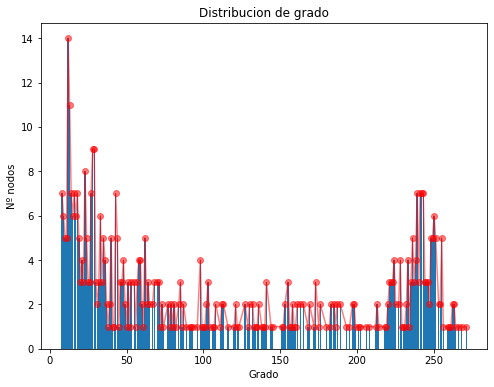

-------------------------------------------------------


In [7]:
estudio_red_BA_EX([515], [8],[[0.7, 0.2]], 1)